In [1]:
import numpy as np
import libpysal as lp
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from folium import Marker, GeoJson
from folium.plugins import HeatMap
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
GI = gpd.read_file('C:/Users/Lenovo/Pak Ogin/Proyek/bts/gardu_induk.shp')
GD = gpd.read_file('C:/Users/Lenovo/Pak Ogin/Proyek/bts/gardu.shp')
Area = gpd.read_file('C:/Users/Lenovo/Pak Ogin/Proyek/bts/bts_area.shp')

In [3]:
GI.head()

,id,GI,Alamat,y,x,status,nama_group,geometry
0,1,LENGKONG 2,KP. BOJONG BELAKANG PERUMAHAN METRO SERPONG,-6.340699,106.645592,RENCANA,NaN,POINT (106.64559 -6.34070)
1,2,SINAR HABITAT,DESA SERDANG KULON PANONGAN SERPONG,-6.311716,106.544475,RENCANA,NaN,POINT (106.54448 -6.31172)
2,3,MILLENIUM,JL. MILLENIUM RAYA IIA.E.2,-6.250000,106.497778,COMMITED PROJECT,NaN,POINT (106.49778 -6.25000)
3,4,CENGKARENG 2,-,-6.150472,106.658980,RENCANA,5,POINT (106.65898 -6.15047)
4,5,BALARAJA,"Jln. Raya Kresek Kamp Merak Balaraja, Tangerang",-6.172203,106.443223,OPERASI,NaN,POINT (106.44322 -6.17220)


In [4]:
GD.head()

,id,kdarea,nama_area,kode_aset_,nama_gi,kode_ase_1,nama_penyu,kode_ase_2,gardu,alamat1,gps_x,gps_y,status_rc,fungsi_gar,geometry
0,1,54210,BANDENGAN,169,PRIOK TIMUR,16902,EPSON,1021806,A100,PINTU AIR ANCOL,-6.128278,106.839944,TIDAK ADA,GD,POINT (106.83994 -6.12828)
1,2,54210,BANDENGAN,102,ANCOL,10241,BINARIA4,1024101,A101,PARK ROYAL,-6.126708,106.830528,TIDAK ADA,GD,POINT (106.83053 -6.12671)
2,3,54210,BANDENGAN,102,ANCOL,10203,BUIH,1020306,A102,JL KARANG BOLONG RAYA,-6.127750,106.828160,TIDAK ADA,GD,POINT (106.82816 -6.12775)
3,4,54210,BANDENGAN,169,PRIOK TIMUR,16901,ACER,1360511,A104,PT RUKINDO,-6.115457,106.862986,TIDAK ADA,GD,POINT (106.86299 -6.11546)
4,5,54210,BANDENGAN,102,ANCOL,10226,ATOL,1022601,A105,JL.ANCOL BARAT,-6.129520,106.819940,TIDAK ADA,GD,POINT (106.81994 -6.12952)


<Axes: >

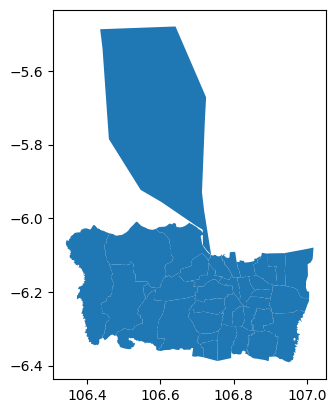

In [5]:
Area.plot()

# Peta GI yang sudah beroperasi

In [6]:
GI_Exist = GI.copy()

In [7]:
print(GI['status'].unique())

['RENCANA' 'COMMITED PROJECT' 'OPERASI' 'KONSTRUKSI']


In [8]:
#GI_Exist = GI_Exist[GI_Exist["status"] == 'OPERASI'] 

In [9]:
GI_Exist

,id,GI,Alamat,y,x,status,nama_group,geometry
0,1,LENGKONG 2,KP. BOJONG BELAKANG PERUMAHAN METRO SERPONG,-6.340699,106.645592,RENCANA,NaN,POINT (106.64559 -6.34070)
1,2,SINAR HABITAT,DESA SERDANG KULON PANONGAN SERPONG,-6.311716,106.544475,RENCANA,NaN,POINT (106.54448 -6.31172)
2,3,MILLENIUM,JL. MILLENIUM RAYA IIA.E.2,-6.250000,106.497778,COMMITED PROJECT,NaN,POINT (106.49778 -6.25000)
3,4,CENGKARENG 2,-,-6.150472,106.658980,RENCANA,5,POINT (106.65898 -6.15047)
4,5,BALARAJA,"Jln. Raya Kresek Kamp Merak Balaraja, Tangerang",-6.172203,106.443223,OPERASI,NaN,POINT (106.44322 -6.17220)
...,...,...,...,...,...,...,...,...
85,86,RAGUNAN,"JL HARSONO RM, PUSDIKLAT PLN JAKARTA SELATAN",-6.300644,106.818284,RENCANA,NaN,POINT (106.81828 -6.30064)
86,87,PONDOK INDAH 2 - CIRENDEU,JL. PURNAWARMAN,-6.317399,106.759620,RENCANA,1,POINT (106.75962 -6.31740)
87,88,AGP II,Jln. Karet Sawah,-6.221645,106.818760,RENCANA,2,POINT (106.81876 -6.22164)
88,89,PELINDO II,-,-6.108983,106.882276,RENCANA,NaN,POINT (106.88228 -6.10898)


<Axes: >

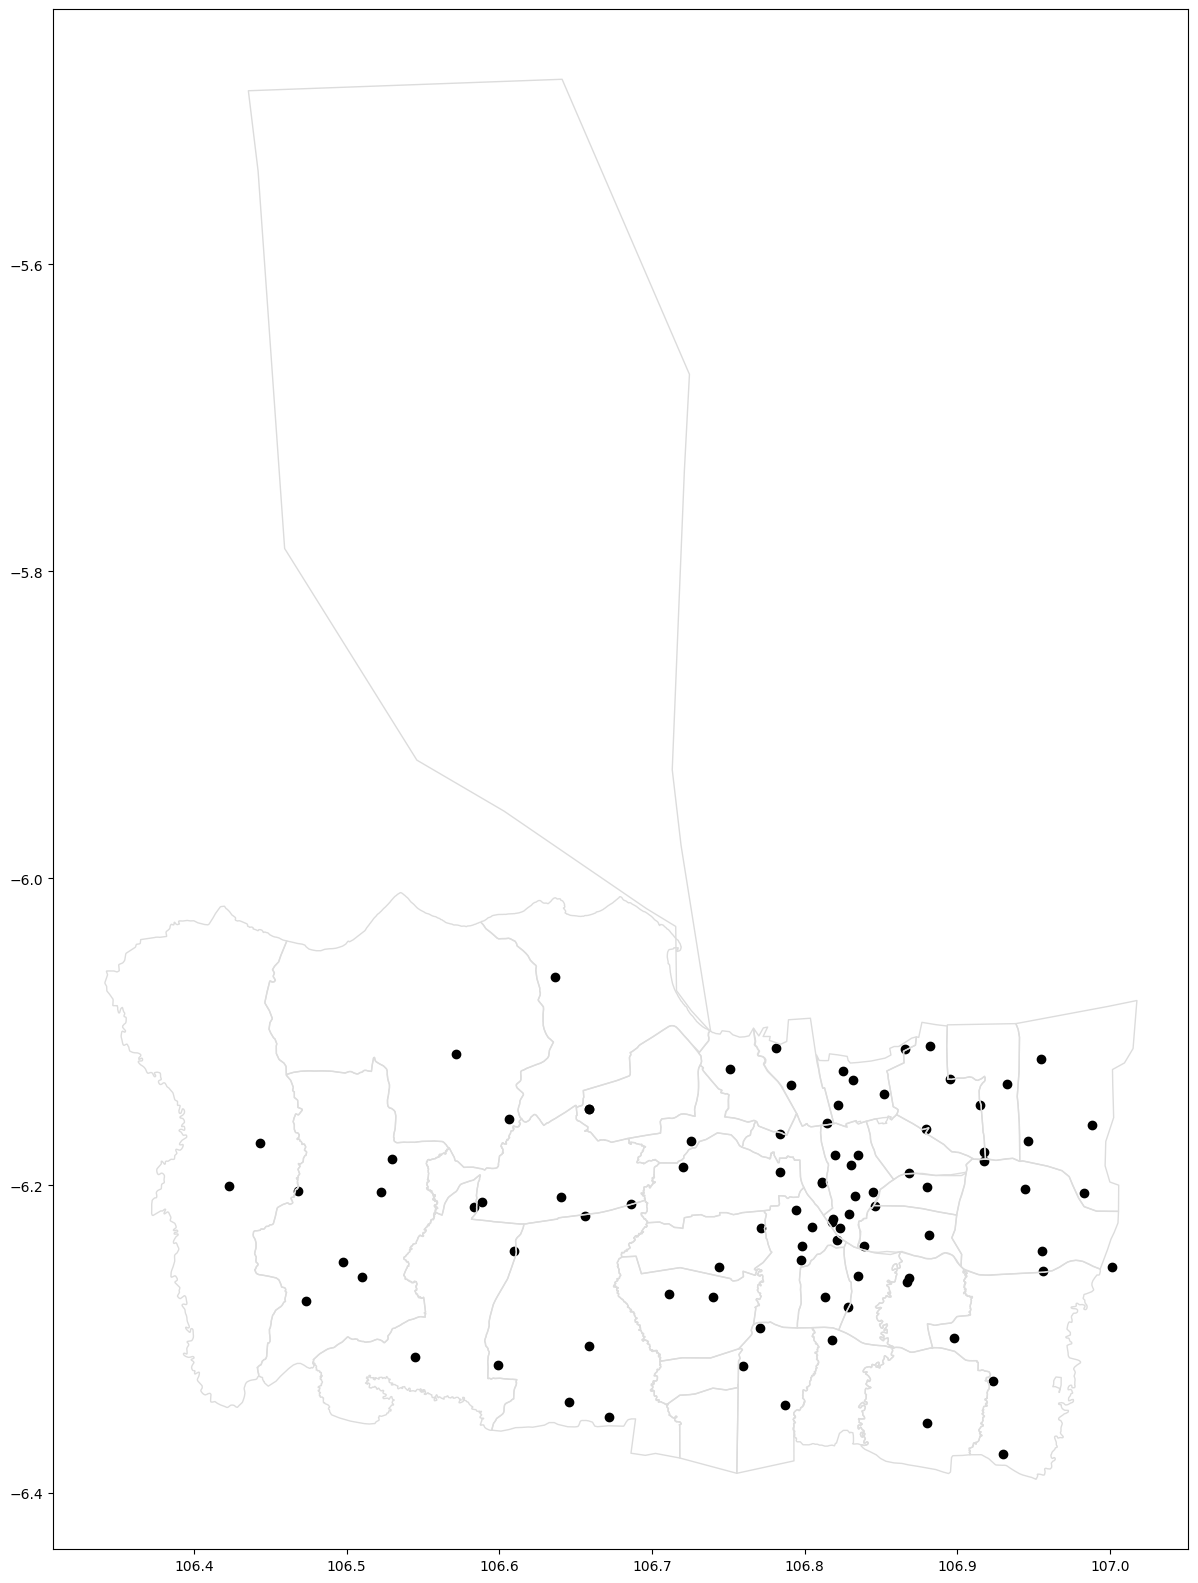

In [10]:
# Define a base map with county boundaries
ax = Area.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
GI_Exist.plot(color='black', ax=ax)

# Peta GD yang sudah beroperasi

In [11]:
GD_Exist = GD.copy()

In [12]:
GD_Exist['gps_y'] = GD_Exist['gps_y'].abs().mask(GD_Exist['gps_y']<0, -GD_Exist['gps_y'])
GD_Exist['gps_x'] = GD_Exist['gps_x'].abs().mask(GD_Exist['gps_x']<0, -GD_Exist['gps_x'])

In [13]:
GD_Exist['gps_x'], GD_Exist['gps_y'] = np.where(GD_Exist['gps_x'] > GD_Exist['gps_y'], [GD_Exist['gps_y'], GD_Exist['gps_x']], [GD_Exist['gps_x'], GD_Exist['gps_y']])

In [14]:
GD_Exist['gps_x'] = GD_Exist['gps_x'].mask(GD_Exist['gps_x']>0, -GD_Exist['gps_x'])

In [15]:
GD_Exist = gpd.GeoDataFrame(
    GD_Exist, geometry=gpd.points_from_xy(GD_Exist.gps_y, GD_Exist.gps_x))

In [16]:
GD_Exist.head()

,id,kdarea,nama_area,kode_aset_,nama_gi,kode_ase_1,nama_penyu,kode_ase_2,gardu,alamat1,gps_x,gps_y,status_rc,fungsi_gar,geometry
0,1,54210,BANDENGAN,169,PRIOK TIMUR,16902,EPSON,1021806,A100,PINTU AIR ANCOL,-6.128278,106.839944,TIDAK ADA,GD,POINT (106.83994 -6.12828)
1,2,54210,BANDENGAN,102,ANCOL,10241,BINARIA4,1024101,A101,PARK ROYAL,-6.126708,106.830528,TIDAK ADA,GD,POINT (106.83053 -6.12671)
2,3,54210,BANDENGAN,102,ANCOL,10203,BUIH,1020306,A102,JL KARANG BOLONG RAYA,-6.127750,106.828160,TIDAK ADA,GD,POINT (106.82816 -6.12775)
3,4,54210,BANDENGAN,169,PRIOK TIMUR,16901,ACER,1360511,A104,PT RUKINDO,-6.115457,106.862986,TIDAK ADA,GD,POINT (106.86299 -6.11546)
4,5,54210,BANDENGAN,102,ANCOL,10226,ATOL,1022601,A105,JL.ANCOL BARAT,-6.129520,106.819940,TIDAK ADA,GD,POINT (106.81994 -6.12952)


In [17]:
GD_Exist = GD_Exist.drop(['kdarea', 'kode_aset_', 'kode_ase_1', 'kode_ase_2'], axis=1)

In [18]:
print(GD_Exist['status_rc'].unique())

['TIDAK ADA' 'RC' 'MOTOR_NO_RC' 'RUSAK']


In [19]:
GD_Exist = GD_Exist[GD_Exist["status_rc"] != 'MOTOR_NO_RC']

<Axes: >

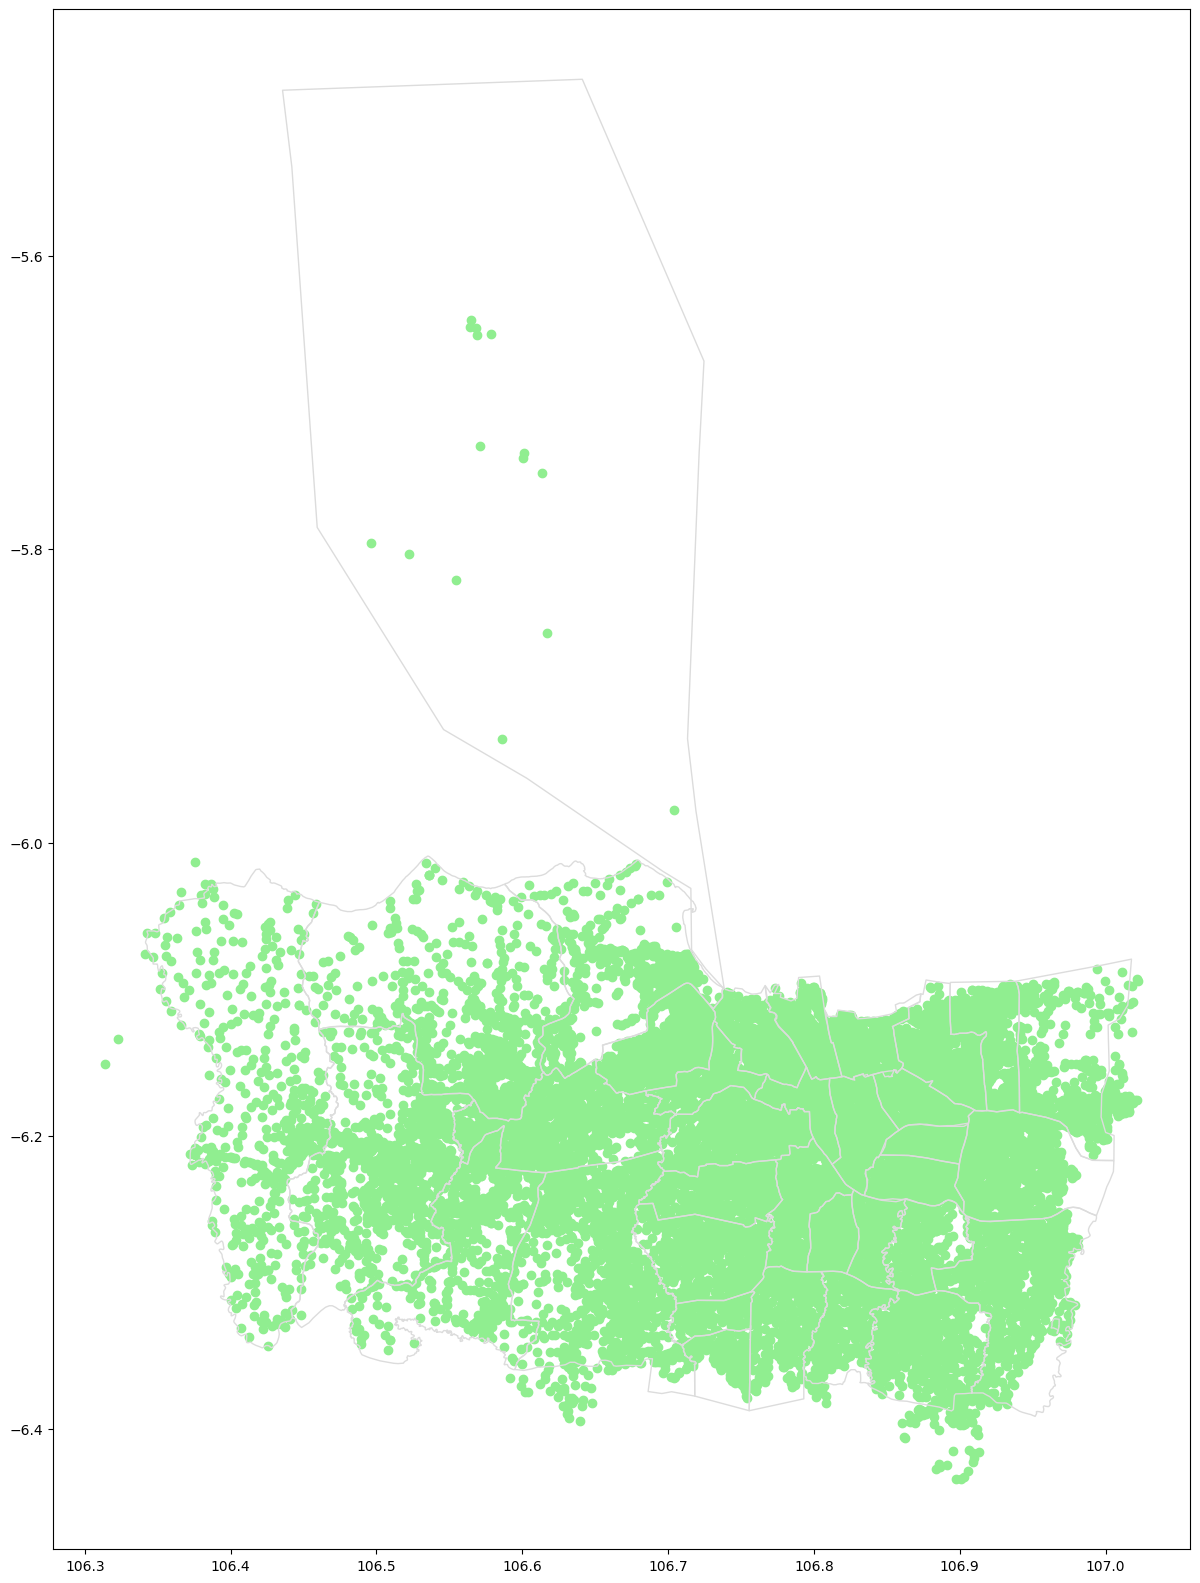

In [20]:
# Define a base map with county boundaries
ax = Area.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
GD_Exist.plot(color='lightgreen', ax=ax)

# Peta GI dan GD yang exist

<Axes: >

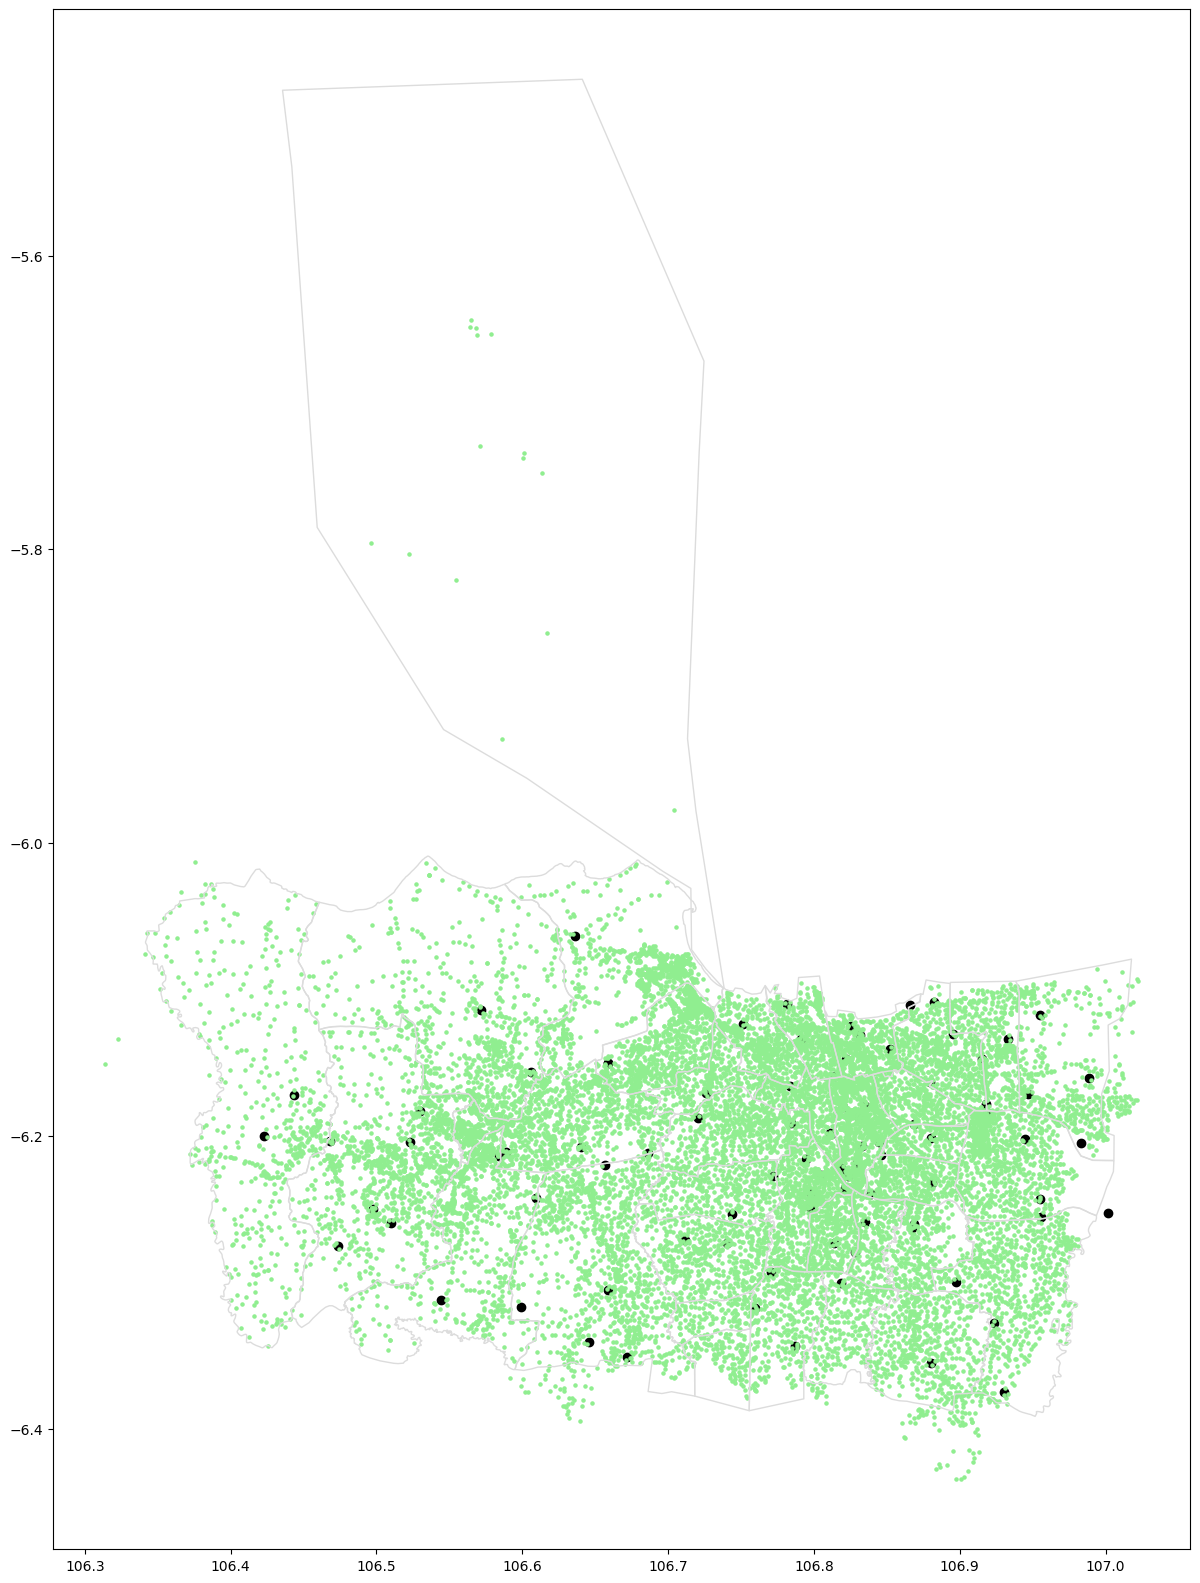

In [21]:
# Define a base map with county boundaries
ax = Area.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
GI_Exist.plot(color='black', ax=ax)
GD_Exist.plot(color='lightgreen', markersize=5, ax=ax)

# K-Means Clustering GD berdasarkan GI

In [67]:
def kmeans_known_centers(X, centers):
    k = len(centers)
    D = np.zeros((len(X), k))
    for i in range(k):
        D[:, i] = np.linalg.norm(X - centers[i], axis=1)
    labels = np.argmin(D, axis=1)
    return labels, centers

In [68]:
coordinates = GD_Exist[['gps_y', 'gps_x']].to_numpy()

In [69]:
centers = GI_Exist[['x', 'y']].to_numpy()

In [70]:
labels, centers = kmeans_known_centers(coordinates, centers)

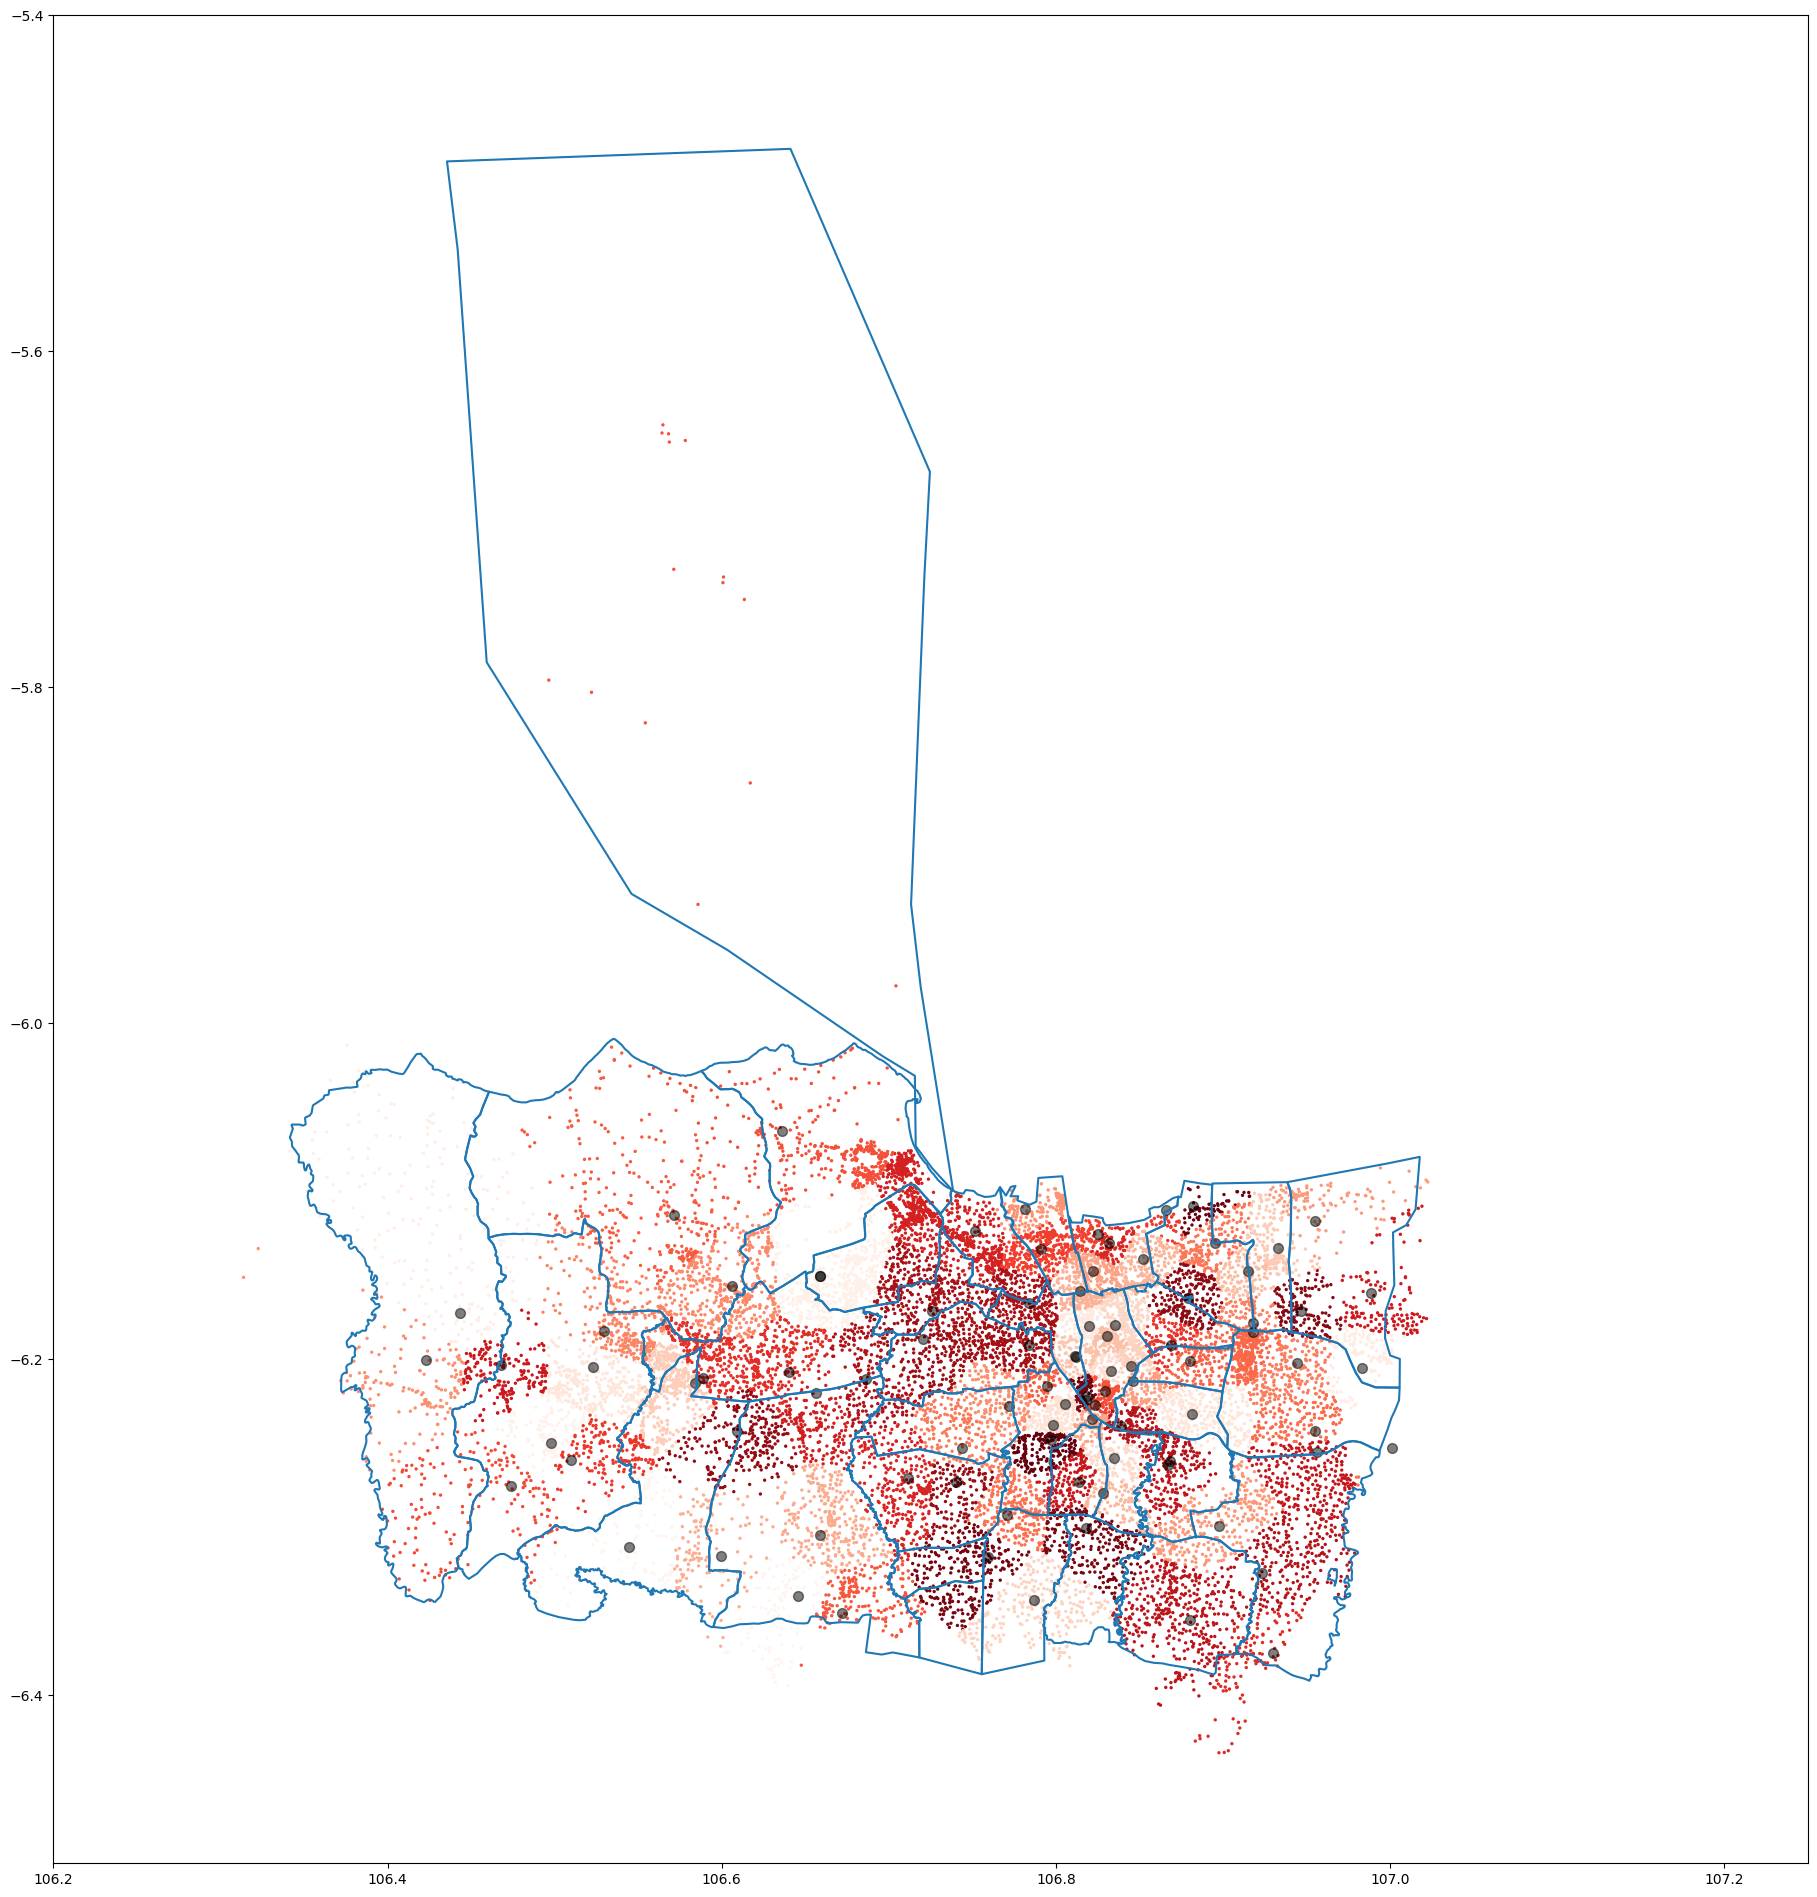

In [78]:
#Plot clusters
Area.boundary.plot(figsize=(32,24))
#figure(num=None, figsize=(32, 24), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, s=2, cmap='Reds')
#centers = kmeans.cluster_centers_
plt.xlim([106.2,107.25])
plt.ylim([-6.5,-5.4])
plt.scatter(centers[:, 0],centers[:, 1],c='black',s=50,alpha=0.5);
plt.savefig('substation_by_centroid.png', bbox_inches='tight')